# Data Science Boot Camp

# Introduction to Data Analytics with Pandas

* Every year approximately 20% of airline flights are delayed or cancelled, resulting in significant costs to both travellers and airlines. As our example use-case, we will build a supervised learning model that predicts airline delay from historial flight data and weather information.<br>
<br>
* Let's begin by exploring the airline delay dataset available here: http://stat-computing.org/dataexpo/2009/the-data.html This dataset includes details about flights in the US from the years 1987-2008. Every row in the dataset includes 29 variables:<br>

<table width="100%">
<tbody><tr>
  <th></th>
  <th>Name</th>
  <th>Description</th>
</tr>
<tr>
 <td>1  </td><td> Year              </td><td>1987-2008</td>
</tr><tr>
 <td>2  </td><td> Month             </td><td>1-12</td>
</tr><tr>
 <td>3  </td><td> DayofMonth        </td><td>1-31</td>
</tr><tr>
 <td>4  </td><td> DayOfWeek         </td><td>1 (Monday) - 7 (Sunday)</td>
</tr><tr>
 <td>5  </td><td> DepTime           </td><td>actual departure time (local, hhmm)</td>
</tr><tr>
 <td>6  </td><td> CRSDepTime        </td><td>scheduled departure time (local, hhmm)</td>
</tr><tr>
 <td>7  </td><td> ArrTime           </td><td>actual arrival time (local, hhmm)</td>
</tr><tr>
 <td>8  </td><td> CRSArrTime        </td><td>scheduled arrival time (local, hhmm)</td>
</tr><tr>
 <td>9  </td><td> UniqueCarrier     </td><td>unique carrier code</td>
</tr><tr>
 <td>10 </td><td> FlightNum         </td><td>flight number</td>
</tr><tr>
 <td>11 </td><td> TailNum           </td><td>plane tail number</td>
</tr><tr>
 <td>12 </td><td> ActualElapsedTime </td><td>in minutes</td>
</tr><tr>
 <td>13 </td><td> CRSElapsedTime    </td><td>in minutes</td>
</tr><tr>
 <td>14 </td><td> AirTime           </td><td>in minutes</td>
</tr><tr>
 <td>15 </td><td> ArrDelay          </td><td>arrival delay, in minutes</td>
</tr><tr>
 <td>16 </td><td> DepDelay          </td><td>departure delay, in minutes</td>
</tr><tr>
 <td>17 </td><td> Origin            </td><td>origin</td>
</tr><tr>
 <td>18 </td><td> Dest              </td><td>destination</td>
</tr><tr>
 <td>19 </td><td> Distance          </td><td>in miles</td>
</tr><tr>
 <td>20 </td><td> TaxiIn            </td><td>taxi in time, in minutes</td>
</tr><tr>
 <td>21 </td><td> TaxiOut           </td><td>taxi out time in minutes</td>
</tr><tr>
 <td>22 </td><td> Cancelled           </td><td>was the flight cancelled?</td>
</tr><tr>
 <td>23 </td><td> CancellationCode  </td><td>reason for cancellation (A = carrier, B = weather, C = NAS, D = security)</td>
</tr><tr>
 <td>24 </td><td> Diverted          </td><td>1 = yes, 0 = no</td>
</tr><tr>
 <td>25 </td><td> CarrierDelay      </td><td>in minutes</td>
</tr><tr>
 <td>26 </td><td> WeatherDelay      </td><td>in minutes</td>
</tr><tr>
 <td>27 </td><td> NASDelay          </td><td>in minutes</td>
</tr><tr>
 <td>28 </td><td> SecurityDelay     </td><td>in minutes</td>
</tr><tr>
 <td>29 </td><td> LateAircraftDelay </td><td>in minutes</td>
</tr>
</tbody></table>

* To simplify, we will build a supervised learning model to predict flight delays for flights leaving O'Hare International airport (ORD), where we "learn" the model using data from 2007, and evaluate its performance using data from 2008.<br>
<br>
* But first, let's do some exploration of this dataset. Exploration is a common step in building a predictive model -- our goal is to better understand the data we have and get some clues as to which features might be good for the predictive model.<br>

* We start by importing some useful python libraries that we will need later like Pandas, Numpy, Scikit-learn and Matplotlib.<br>

In [2]:
import sys
import random
import numpy as np

from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 30)

/Users/alpyuzbasioglu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First, let's read the raw data for 2007 into a Pandas dataframe.

In [5]:
df = pd.read_csv(".data/2007.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0
5,2007,1,1,1,1430.0,1420,1553.0,1550,WN,2386,N611SW,83.0,90.0,74.0,3.0,10.0,SMF,PDX,479,2,7,0,NaN,0,0,0,0,0,0
6,2007,1,1,1,1936.0,1840,2217.0,2130,WN,409,N482,101.0,110.0,89.0,47.0,56.0,SMF,PHX,647,5,7,0,NaN,0,46,0,0,0,1
7,2007,1,1,1,944.0,935,1223.0,1225,WN,1131,N749SW,99.0,110.0,86.0,-2.0,9.0,SMF,PHX,647,4,9,0,NaN,0,0,0,0,0,0
8,2007,1,1,1,1537.0,1450,1819.0,1735,WN,1212,N451,102.0,105.0,90.0,44.0,47.0,SMF,PHX,647,5,7,0,NaN,0,20,0,0,0,24
9,2007,1,1,1,1318.0,1315,1603.0,1610,WN,2456,N630WN,105.0,115.0,92.0,-7.0,3.0,SMF,PHX,647,5,8,0,NaN,0,0,0,0,0,0


* We see 7.4M+ flights in 2007 and 29 variables.<br>
<br>
* Our "target" variable will be DepDelay (scheduled departure delay in minutes). To build a classifier, we further refine our target variable into a binary variable by defining a "delay" as having 15 mins or more of delay, and "non-delay" otherwise. We thus create a new binary variable that we name 'DepDelayed'.<br>
<br>
* Let's look at some basic statistics, after limiting ourselves to flights originating from ORD:

In [6]:
mask = df['Origin'] == 'ORD'
DF_2007 = df[mask].dropna(subset=['DepDelay'])

In [7]:
DF_2007.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
93696,2007,1,25,4,1052.0,1100,1359.0,1414,XE,1202,N12167,127.0,134.0,105.0,-15.0,-8.0,ORD,EWR,719,5,17,0,NaN,0,0,0,0,0,0
93813,2007,1,28,7,1541.0,1500,1811.0,1750,XE,2836,N12163,150.0,170.0,128.0,21.0,41.0,ORD,IAH,925,7,15,0,NaN,0,0,0,5,0,16
93841,2007,1,29,1,2045.0,2000,2305.0,2211,XE,2701,N14508,80.0,71.0,52.0,54.0,45.0,ORD,CLE,316,9,19,0,NaN,0,0,0,9,0,45
93935,2007,1,17,3,1851.0,1900,2204.0,2220,XE,1206,N19554,133.0,140.0,109.0,-16.0,-9.0,ORD,EWR,719,11,13,0,NaN,0,0,0,0,0,0
93998,2007,1,12,5,2045.0,1745,2256.0,2003,XE,2023,N15973,71.0,78.0,45.0,173.0,180.0,ORD,CLE,316,6,20,0,NaN,0,0,0,0,0,173


In [8]:
mask2 = DF_2007['DepDelay'] >= 15
DF_2007['DepDelayed'] = mask2
print "total flights: " + str(DF_2007.shape[0])
print "total delays: " + str(DF_2007['DepDelayed'].sum())
DF_2007[DF_2007['DepDelayed'] == True].shape

total flights: 359169
total delays: 109346


(109346, 30)

* Let's see how delayed flights are distributed by month:

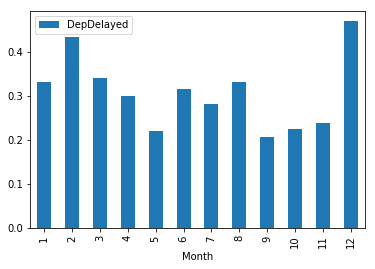

In [9]:
# Compute average number of delayed flights per month
grouped = DF_2007[['DepDelayed', 'Month']].groupby('Month').mean()

# plot average delays by month
grouped.plot(kind='bar')

* We see that the average number of delays is highest in December and February.

* Now let's look at the hour-of-day:

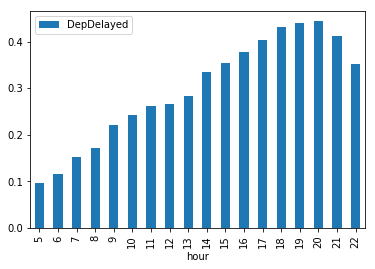

In [10]:
# Compute average number of delayed flights by hour
DF_2007['hour'] = DF_2007['CRSDepTime'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
grouped = DF_2007[['DepDelayed', 'hour']].groupby('hour').mean()

# plot average delays by hour of day
grouped.plot(kind='bar')

In [104]:
CRSDepTime = 935
filled = str(CRSDepTime).zfill(4)
print(filled)
print(filled[:2])
print(int(filled[:2]))

0935
09
9


* A clear pattern here - flights tend to be delayed later in the day. Perhaps this is because delays tend to pile up as the day progresses and the problem tends to compound later in the day.

* Now let's look at delays by carrier:

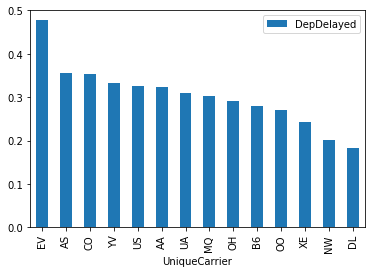

In [20]:
# Compute average number of delayed flights per carrier
grouped1 = DF_2007[['DepDelayed', 'UniqueCarrier']].groupby('UniqueCarrier').filter(lambda x: len(x)>10)
grouped2 = grouped1.groupby('UniqueCarrier').mean()
carrier = grouped2.sort_values(['DepDelayed'], ascending=False)

# display top 15 destination carriers by delay (from ORD)
carrier[:15].plot(kind='bar')

In [69]:
carrierCodesDF = pd.read_csv("./data/carrierCodes.csv")

In [70]:
carrierWithNames = pd.merge(grouped1, carrierCodesDF[['Carrier Name', '2-Char IATA']], left_on='UniqueCarrier', right_on='2-Char IATA')

In [71]:
carrierWithNames = carrierWithNames.rename(columns={'UniqueCarrier': 'carrierCode'})
del carrierWithNames['2-Char IATA']

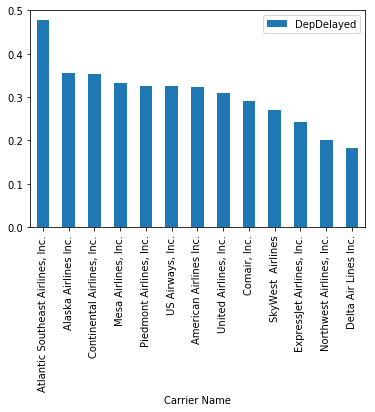

In [72]:
grouped23 = carrierWithNames.groupby('Carrier Name').mean()
carrierPlot = grouped23.sort_values(['DepDelayed'], ascending=False)
carrierPlot[:15].plot(kind='bar')